# Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Dataset

In [3]:
df= pd.read_csv('fires_data_11-29-2021.csv')
df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1990,1990,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
1,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1991,1991,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
2,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1992,1992,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
3,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1993,1993,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
4,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1994,1994,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN


# Shape of data

In [4]:
row, cols= df.shape
print("Number of rows:", row)
print("Number of columns:", cols)

Number of rows: 47649
Number of columns: 17


# Data types

In [5]:
df.dtypes

Domain Code          object
Domain               object
Area Code (ISO3)     object
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Source Code           int64
Source               object
Unit                 object
Value               float64
Flag                 object
Flag Description     object
Note                float64
dtype: object

# Check missing values

In [6]:
df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (ISO3)        0
Area                    0
Element Code            0
Element                 0
Item Code               0
Item                    0
Year Code               0
Year                    0
Source Code             0
Source                  0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                47649
dtype: int64

# Dropping unnecessary columns

In [7]:
df.drop(['Note','Domain Code','Element Code','Item Code','Flag Description','Flag','Source Code'], axis=1, inplace=True)

#### Dataset Structure

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47649 entries, 0 to 47648
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain            47649 non-null  object 
 1   Area Code (ISO3)  47649 non-null  object 
 2   Area              47649 non-null  object 
 3   Element           47649 non-null  object 
 4   Item              47649 non-null  object 
 5   Year Code         47649 non-null  int64  
 6   Year              47649 non-null  int64  
 7   Source            47649 non-null  object 
 8   Unit              47649 non-null  object 
 9   Value             47649 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 3.6+ MB


# Summery of data

In [9]:
df.describe()

,Year Code,Year,Value
count,47649.000000,47649.000000,4.764900e+04
mean,2004.636404,2004.636404,4.120817e+05
std,8.609612,8.609612,2.744637e+06
min,1990.000000,1990.000000,0.000000e+00
25%,1997.000000,1997.000000,0.000000e+00
50%,2005.000000,2005.000000,0.000000e+00
75%,2012.000000,2012.000000,5.514973e+03
max,2019.000000,2019.000000,1.052085e+08


# Unique Values

In [10]:
df.nunique()

Domain                  1
Area Code (ISO3)      238
Area                  238
Element                 1
Item                    7
Year Code              30
Year                   30
Source                  1
Unit                    1
Value               17549
dtype: int64

# Value counts

In [11]:
df['Item'].value_counts()

Humid tropical forest    6807
Other forest             6807
Closed shrubland         6807
Grassland                6807
Open shrubland           6807
Savanna                  6807
Woody savanna            6807
Name: Item, dtype: int64

# Land affected by fires yearly

In [12]:
s=df.groupby(["Year"]).sum().sort_values(by="Value", ascending=False).head(30)
s

,Year Code,Value
Year,,
2012,3239320,8.320688e+08
2007,3217221,8.303040e+08
2011,3223633,8.294422e+08
2002,3195192,8.285003e+08
2004,3198384,8.227932e+08
2005,3199980,7.998101e+08
2003,3196788,7.846035e+08
2006,3215618,7.715579e+08
2010,3222030,7.536716e+08


Text(0.5, 1.0, 'Land affected by fires yearly')

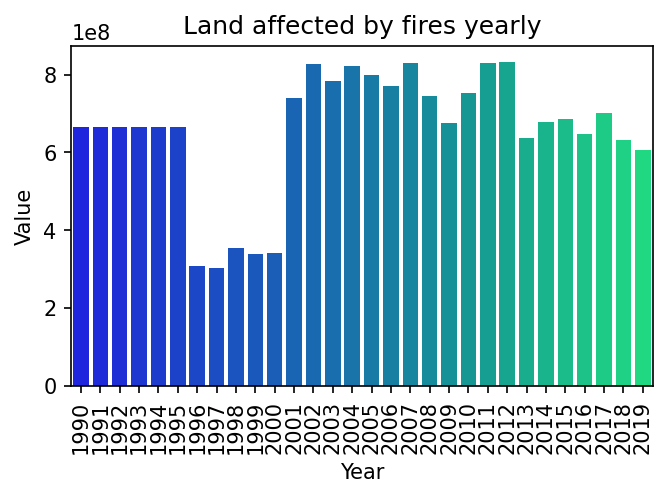

In [13]:
plt.figure(figsize=(5,3), dpi=150, linewidth=2)
sns.barplot(x=s.index,y='Value',data=s, palette="winter")
plt.xticks(rotation=90)
plt.title('Land affected by fires yearly')

# Top 10 countries affected by fires

In [14]:
a=df.groupby(["Area"]).sum().sort_values(by="Value", ascending=False).head(10)
a

,Year Code,Year,Value
Area,,,
Australia,420945,420945,2.650662e+09
Angola,420945,420945,1.927834e+09
Democratic Republic of the Congo,420945,420945,1.698499e+09
Sudan (former),308077,308077,1.304401e+09
Zambia,420945,420945,1.204405e+09
Mozambique,420945,420945,1.040799e+09
Central African Republic,420945,420945,9.843985e+08
Brazil,420945,420945,8.904736e+08
United Republic of Tanzania,420945,420945,6.783696e+08


Text(0.5, 1.0, 'Top 10 Countries affected by fires')

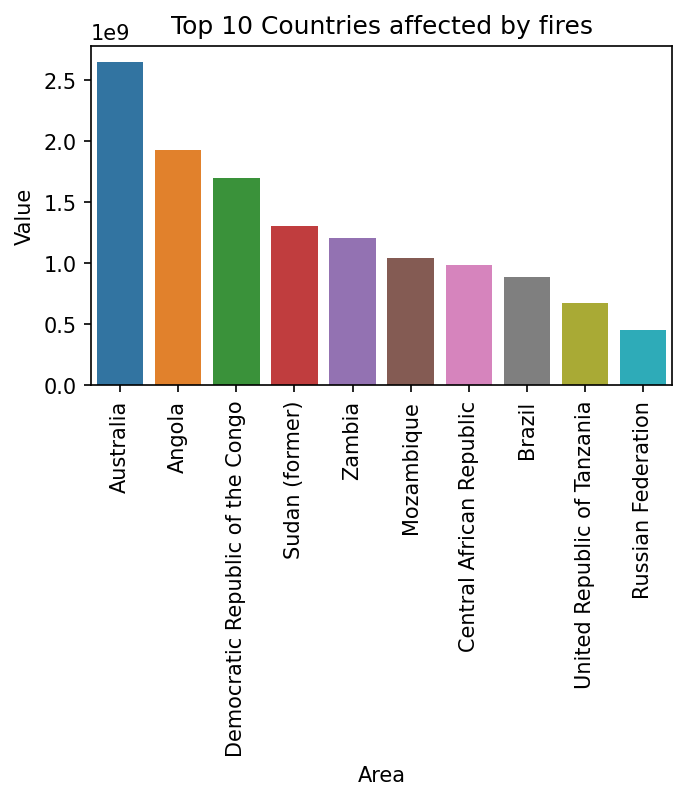

In [15]:
plt.figure(figsize=(5,3), dpi=150, linewidth=2)
sns.barplot(x=a.index,y='Value',data=a)
plt.xticks(rotation=90)
plt.title('Top 10 Countries affected by fires')

# Item type burned by fire over years

In [16]:
b=df.groupby(["Item"]).sum().sort_values(by="Value", ascending=False)
b

,Year Code,Year,Value
Item,,,
Savanna,13645560,13645560,7.831523e+09
Grassland,13645560,13645560,6.801505e+09
Woody savanna,13645560,13645560,1.957280e+09
Open shrubland,13645560,13645560,1.365417e+09
Humid tropical forest,13645560,13645560,1.132681e+09
Other forest,13645560,13645560,4.478974e+08
Closed shrubland,13645560,13645560,9.897531e+07


Text(0.5, 1.0, 'Item type affected by fires')

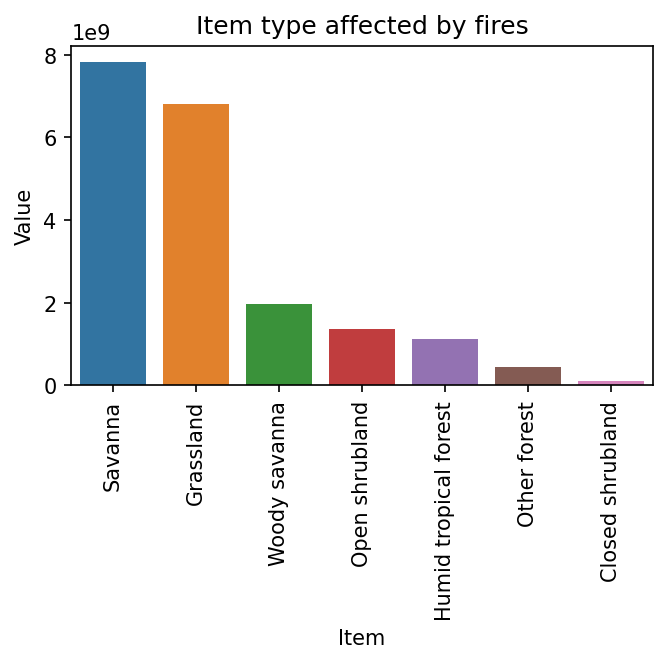

In [17]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=b.index,y='Value',data=b)
plt.xticks(rotation=90)
plt.title("Item type affected by fires")

# Maximum area burned in a year in a country

In [18]:
df.groupby(["Year","Area"]).sum().sort_values(by="Value", ascending=False).head(10)

,,Year Code,Value
Year,Area,,
2001,Australia,14007,1.840483e+08
2012,Australia,14084,1.783090e+08
2011,Australia,14077,1.737702e+08
2002,Australia,14014,1.530490e+08
2004,Australia,14028,1.255536e+08
2006,Australia,14042,1.134671e+08
2007,Australia,14049,1.025287e+08
2018,Australia,14126,1.013396e+08
2017,Australia,14119,9.615384e+07


In [19]:
df1 = df.groupby(["Area", "Area Code (ISO3)", "Year"])["Value"].sum().reset_index()
df1.head()

,Area,Area Code (ISO3),Year,Value
0,Afghanistan,AFG,1990,35912.8453
1,Afghanistan,AFG,1991,35912.8453
2,Afghanistan,AFG,1992,35912.8453
3,Afghanistan,AFG,1993,35912.8453
4,Afghanistan,AFG,1994,35912.8453


In [20]:
fig = px.line(df1, x="Year", y="Value",color='Area', title='World Burned Area')
fig.show()

# Item type burned most in a year

In [21]:
df.groupby(["Year","Item"]).sum().sort_values(by="Value", ascending=False).head(10)

,,Year Code,Value
Year,Item,,
2005,Savanna,457140,3.487667e+08
2003,Savanna,456684,3.414789e+08
2007,Savanna,459603,3.294614e+08
2004,Grassland,456912,3.285651e+08
2002,Grassland,456456,3.209670e+08
2007,Grassland,459603,3.209456e+08
2008,Savanna,459832,3.151744e+08
2010,Savanna,460290,3.136204e+08
2004,Savanna,456912,3.135659e+08


# Item burned in a country in a year

In [22]:
df.groupby(["Year","Area","Item"]).sum().sort_values(by="Value", ascending=False).head(10)

,,,Year Code,Value
Year,Area,Item,,
2011,Australia,Open shrubland,2011,1.052085e+08
2012,Australia,Open shrubland,2012,9.431891e+07
2001,Australia,Open shrubland,2001,9.156779e+07
2002,Australia,Open shrubland,2002,8.998342e+07
2001,Australia,Grassland,2001,7.639979e+07
2004,Australia,Grassland,2004,6.797964e+07
2012,Australia,Grassland,2012,6.456851e+07
2011,Australia,Grassland,2011,5.287709e+07
2017,Australia,Open shrubland,2017,5.209256e+07


# Fire data for selected countries

In [23]:
df_selected = df[df["Area"].isin(["India", "Pakistan","Bangladesh"])]

In [24]:
df_selected.head()

,Domain,Area Code (ISO3),Area,Element,Item,Year Code,Year,Source,Unit,Value
3332,Fires,BGD,Bangladesh,Burned Area,Humid tropical forest,1990,1990,FAO TIER 1,ha,30917.0603
3333,Fires,BGD,Bangladesh,Burned Area,Humid tropical forest,1991,1991,FAO TIER 1,ha,30917.0603
3334,Fires,BGD,Bangladesh,Burned Area,Humid tropical forest,1992,1992,FAO TIER 1,ha,30917.0603
3335,Fires,BGD,Bangladesh,Burned Area,Humid tropical forest,1993,1993,FAO TIER 1,ha,30917.0603
3336,Fires,BGD,Bangladesh,Burned Area,Humid tropical forest,1994,1994,FAO TIER 1,ha,30917.0603


In [25]:
df_selected.describe()

,Year Code,Year,Value
count,630.000000,630.000000,6.300000e+02
mean,2004.500000,2004.500000,1.095459e+05
std,8.662319,8.662319,2.811537e+05
min,1990.000000,1990.000000,0.000000e+00
25%,1997.000000,1997.000000,2.122050e+00
50%,2004.500000,2004.500000,1.637099e+03
75%,2012.000000,2012.000000,5.216596e+04
max,2019.000000,2019.000000,2.609465e+06


# Most land burned in selected countries

In [26]:
df_selected.groupby("Area").sum().sort_values(by="Value", ascending=False)

,Year Code,Year,Value
Area,,,
India,420945,420945,6.546250e+07
Bangladesh,420945,420945,2.536032e+06
Pakistan,420945,420945,1.015368e+06


# Most item burned in selected countries

In [27]:
df_selected.groupby("Item").sum().sort_values(by="Value", ascending=False)

,Year Code,Year,Value
Item,,,
Other forest,180405,180405,2.952491e+07
Woody savanna,180405,180405,1.180207e+07
Humid tropical forest,180405,180405,1.146947e+07
Grassland,180405,180405,8.249579e+06
Savanna,180405,180405,7.762407e+06
Open shrubland,180405,180405,1.553655e+05
Closed shrubland,180405,180405,5.010989e+04


# Most burned area in selected countries in a year

In [33]:
sy=df_selected.groupby("Year").sum().sort_values(by="Value", ascending=False).reset_index()
sy

,Year,Year Code,Value
0,2009,42189,5.705159e+06
1,2012,42252,5.201674e+06
2,2010,42210,4.037667e+06
3,2017,42357,3.677225e+06
4,2018,42378,3.413118e+06
5,2004,42084,3.239376e+06
6,2007,42147,2.952916e+06
7,2013,42273,2.908165e+06
8,2014,42294,2.762922e+06
9,2016,42336,2.710776e+06


Text(0.5, 1.0, 'Land affected by fires yearly')

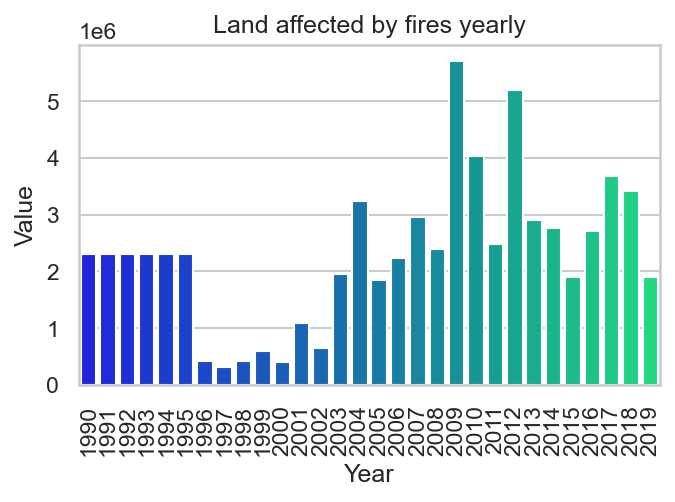

In [34]:
plt.figure(figsize=(5,3), dpi=150, linewidth=2)
sns.barplot(x="Year",y='Value',data=sy, palette="winter")
plt.xticks(rotation=90)
plt.title('Land affected by fires yearly')

Text(0.5, 1.0, 'Fires by year and area')

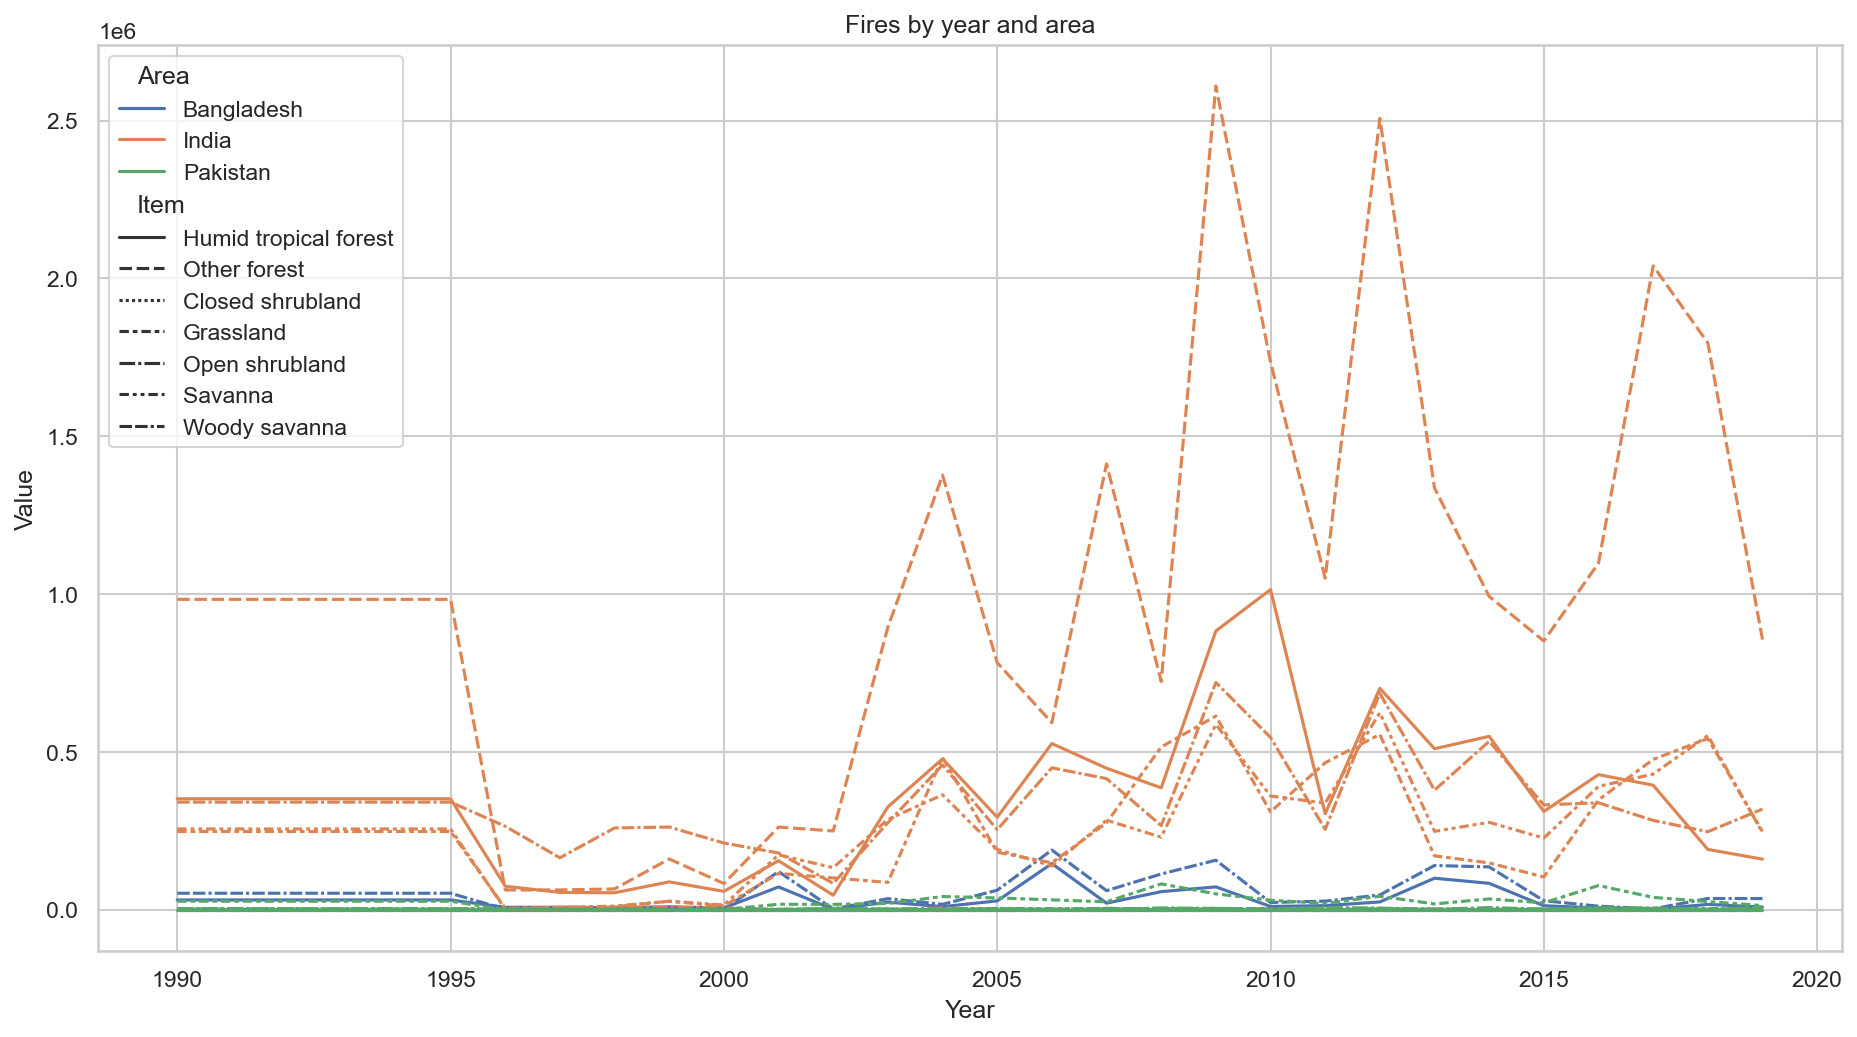

In [35]:
plt.figure(figsize=(15,8), dpi=150)
sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.lineplot(x="Year",y="Value",hue="Area",style="Item",data=df_selected)
plt.title("Fires by year and area")

In [37]:
df_selected.groupby(["Area","Item"]).sum().sort_values(by="Value", ascending=False)

Year Code   Year         Value
Area       Item                                                 
India      Other forest               60135  60135  2.949751e+07
           Humid tropical forest      60135  60135  1.054195e+07
           Woody savanna              60135  60135  1.022475e+07
           Savanna                    60135  60135  7.673059e+06
           Grassland                  60135  60135  7.432449e+06
Bangladesh Woody savanna              60135  60135  1.564979e+06
           Humid tropical forest      60135  60135  9.275118e+05
Pakistan   Grassland                  60135  60135  8.039774e+05
           Open shrubland             60135  60135  9.278010e+04
India      Open shrubland             60135  60135  6.255090e+04
Pakistan   Savanna                    60135  60135  5.921940e+04
India      Closed shrubland           60135  60135  3.024031e+04
Bangladesh Savanna                    60135  60135  3.012942e+04
Pakistan   Other forest               60135  60135  2.740336e+04
           Closed shrubland           60135  60135  1.964518e+04
Bangladesh Grassland                  60135  60135  1.315308e+04
Pakistan   Woody savanna              60135  60135  1.234210e+04
Bangladesh Closed shrubland           60135  60135  2.243958e+02
           Open shrubland             60135  60135  3.454350e+01
Pakistan   Humid tropical forest      60135  60135  0.000000e+00
Bangladesh Other forest               60135  60135  0.000000e+00

In [38]:
df2 = df_selected.groupby(["Area", "Area Code (ISO3)", "Year"])["Value"].sum().reset_index()
df2.head()

,Area,Area Code (ISO3),Year,Value
0,Bangladesh,BGD,1990,84752.5364
1,Bangladesh,BGD,1991,84752.5364
2,Bangladesh,BGD,1992,84752.5364
3,Bangladesh,BGD,1993,84752.5364
4,Bangladesh,BGD,1994,84752.5364


# Graph of subcontinent countries showing yearly fire area

In [39]:
fig = px.line(df2, x="Year", y="Value",color='Area', title='Subcontinent Burned Area')
fig.show()